In [ ]:
import os
os. getcwd()

'/content'

# New Section

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Pima.csv to Pima (2).csv


In [ ]:
import io
#df = pd.read_csv(io.BytesIO(uploaded['Pima.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
pip install bioinfokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import seaborn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import requests
from collections import Counter
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bioinfokit.analys import stat
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

pd.set_option('display.max_columns', 500)
df = pd.read_csv('Pima.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
pip install bioinfokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Overall understanding of the data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.dtypes

Pregnancies                    int64
Glucose                        int64
BloodPressure                  int64
SkinThickness                  int64
Insulin                        int64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                        int64
dtype: object

In [ ]:
#Description of the table before data preprocessing
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#print the shape of dataframe
df.shape

(768, 9)

In [ ]:
# class count
class_count_0, class_count_1 = df['Outcome'].value_counts()
# Separate class
class_0 = df[df['Outcome'] == 0]
class_1 = df[df['Outcome'] == 1]# print the shape of the class

print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (500, 9)
class 1: (268, 9)


Text(0.5, 1.0, 'Count plot of The Diabetic Female in Pima Indians')

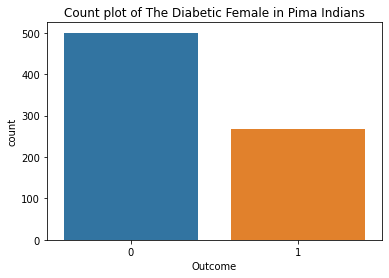

In [ ]:
## creating count plot with title using seaborn
sns.countplot(x=df.Outcome)
plt.title("Count plot of The Diabetic Female in Pima Indians")

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#finding the Null value#
df[['Glucose ','BloodPressure','SkinThickness','Insulin ','BMI']] =  df[['Glucose ','BloodPressure','SkinThickness','Insulin ','BMI']].replace(0, np.NaN)
print(df.isnull().sum())

Pregnancies                    0
Glucose                        5
BloodPressure                 35
SkinThickness                227
Insulin                      374
BMI                           11
DiabetesPedigreeFunction       0
Age                            0
Outcome                        0
dtype: int64


In [ ]:
p=df.isnull().sum() / df.shape[0]
p

Pregnancies                  0.000000
Glucose                      0.006510
BloodPressure                0.045573
SkinThickness                0.295573
Insulin                      0.486979
BMI                          0.014323
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [ ]:
#From the result above we note that these features have more than 05% missing data -Remove the rows containing the missing values if less than 5% of values are #missing in a column, the column Bloodpressure and BMI has less than 5% missing , So we will proceed to delete those missing rows
df = df.dropna(subset=['BloodPressure'])
df = df.dropna(subset=['BMI'])
df = df.dropna(subset=['Glucose '])

In [ ]:
#Using KNN to input the missing data
# define imputer
imputer = KNNImputer()
# fit on the dataset
imputer.fit(df)
# transform the dataset
df_filled = imputer.transform(df)
df_filled = pd.DataFrame(df_filled)
#df_filled.info()
df2 = df_filled.rename({0: 'Pregnancies', 1: 'Glucose',2:'BloodPressure',3:'SkinThickness',4:'Insulin', 5:'BMI',6:'DBF',7:'Age',8:'Outcome'}, axis=1)  # new method
#BMI	DiabetesPedigreeFunction	Age	Outcome
df2.head()
# print total missing
df2.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DBF              0
Age              0
Outcome          0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn

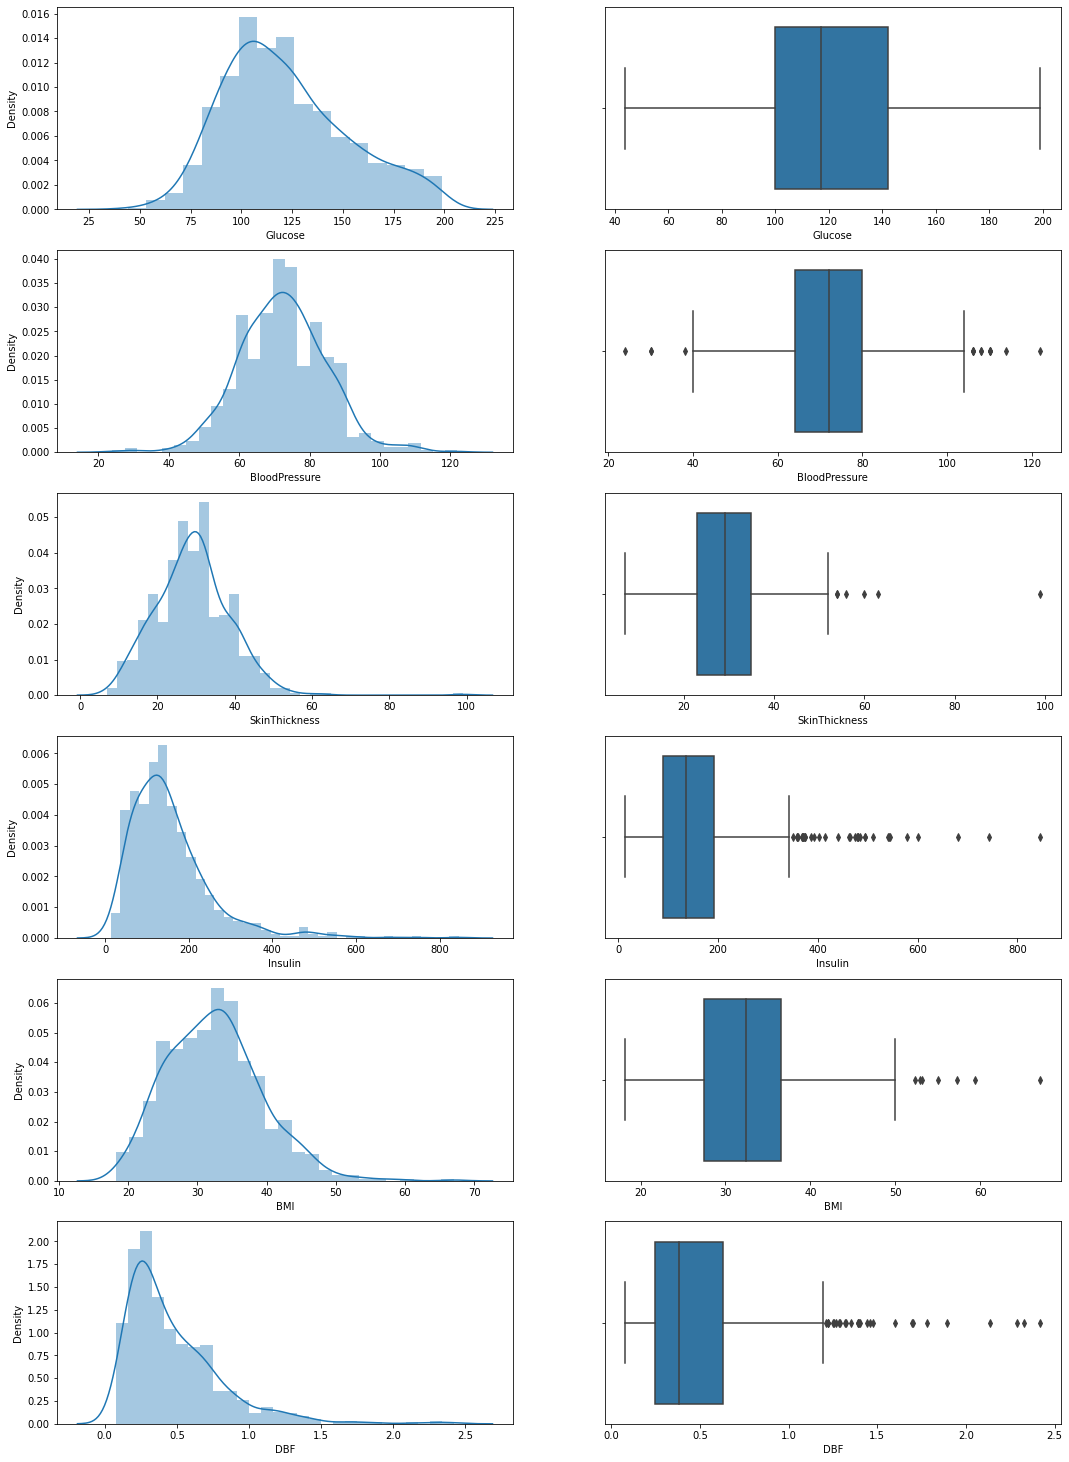

In [ ]:
#Finding outliers in data
plt.figure(figsize=(18,35))
plt.subplot(8,2,3)
sns.distplot(df2['Glucose'])
plt.subplot(8,2,4)
sns.boxplot(df2['Glucose'])
plt.subplot(8,2,5) #histogram
sns.distplot(df2['BloodPressure'])
plt.subplot(8,2,6)
sns.boxplot(df2['BloodPressure'])
plt.subplot(8,2,7) #histogram
sns.distplot(df2['SkinThickness'])
plt.subplot(8,2,8)
sns.boxplot(df2['SkinThickness'])
plt.subplot(8,2,9) #histogram
sns.distplot(df2['Insulin'])
plt.subplot(8,2,10)
sns.boxplot(df2['Insulin'])
plt.subplot(8,2,11) #histogram
sns.distplot(df2['BMI'])
plt.subplot(8,2,12)
sns.boxplot(df2['BMI'])
plt.subplot(8,2,13) #histogram
sns.distplot(df2['DBF'])
plt.subplot(8,2,14)
sns.boxplot(df2['DBF'])
plt.show()

In [ ]:
from collections import Counter
def detect_outliers(df2,features):
    outlier_indices = []

    for c in features:
        # 1st quartile
        Q1 = np.percentile(df2[c],25)
        # 3rd quartile
        Q3 = np.percentile(df2[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df2[(df2[c] < Q1 - outlier_step) | (df2[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)

    return multiple_outliers

In [ ]:
df2.loc[detect_outliers(df2,[ 'Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DBF','Age'])]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DBF,Age,Outcome
418,0.0,180.0,78.0,63.0,14.0,59.4,2.42,25.0,1.0


In [ ]:
df2 = df2.drop(detect_outliers(df2,[ 'Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DBF']),axis = 0).reset_index(drop = True)

In [ ]:
df2.drop(df2.index[df2['Insulin'] > 400.0], inplace = True)
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DBF,Age,Outcome
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
718,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
719,2.0,122.0,70.0,27.0,165.0,36.8,0.340,27.0,0.0
720,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
721,1.0,126.0,60.0,35.2,134.2,30.1,0.349,47.0,1.0


In [ ]:
df2.drop(df2.index[df2['DBF'] > 1.0], inplace = True)
#df2

In [ ]:
df2.drop(df2.index[df2['SkinThickness'] > 50], inplace = True)
#df2

In [ ]:
df2.drop(df2.index[df2['BMI'] > 50], inplace = True)
#df2

In [ ]:
df2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DBF,Age,Outcome
count,644.000000,644.00000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000
mean,3.900621,119.76087,72.049689,28.339441,141.493478,31.876708,0.407508,33.133540,0.315217
std,3.331279,29.55121,12.166318,8.612862,73.210924,6.345578,0.219611,11.749228,0.464964
min,0.000000,44.00000,24.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.00000,64.000000,22.700000,87.450000,27.300000,0.237750,24.000000,0.000000
50%,3.000000,114.00000,72.000000,29.000000,130.000000,32.000000,0.346000,29.000000,0.000000
75%,6.000000,138.00000,80.000000,33.450000,181.850000,35.800000,0.557000,40.250000,1.000000
max,17.000000,198.00000,122.000000,50.000000,392.000000,50.000000,0.997000,81.000000,1.000000


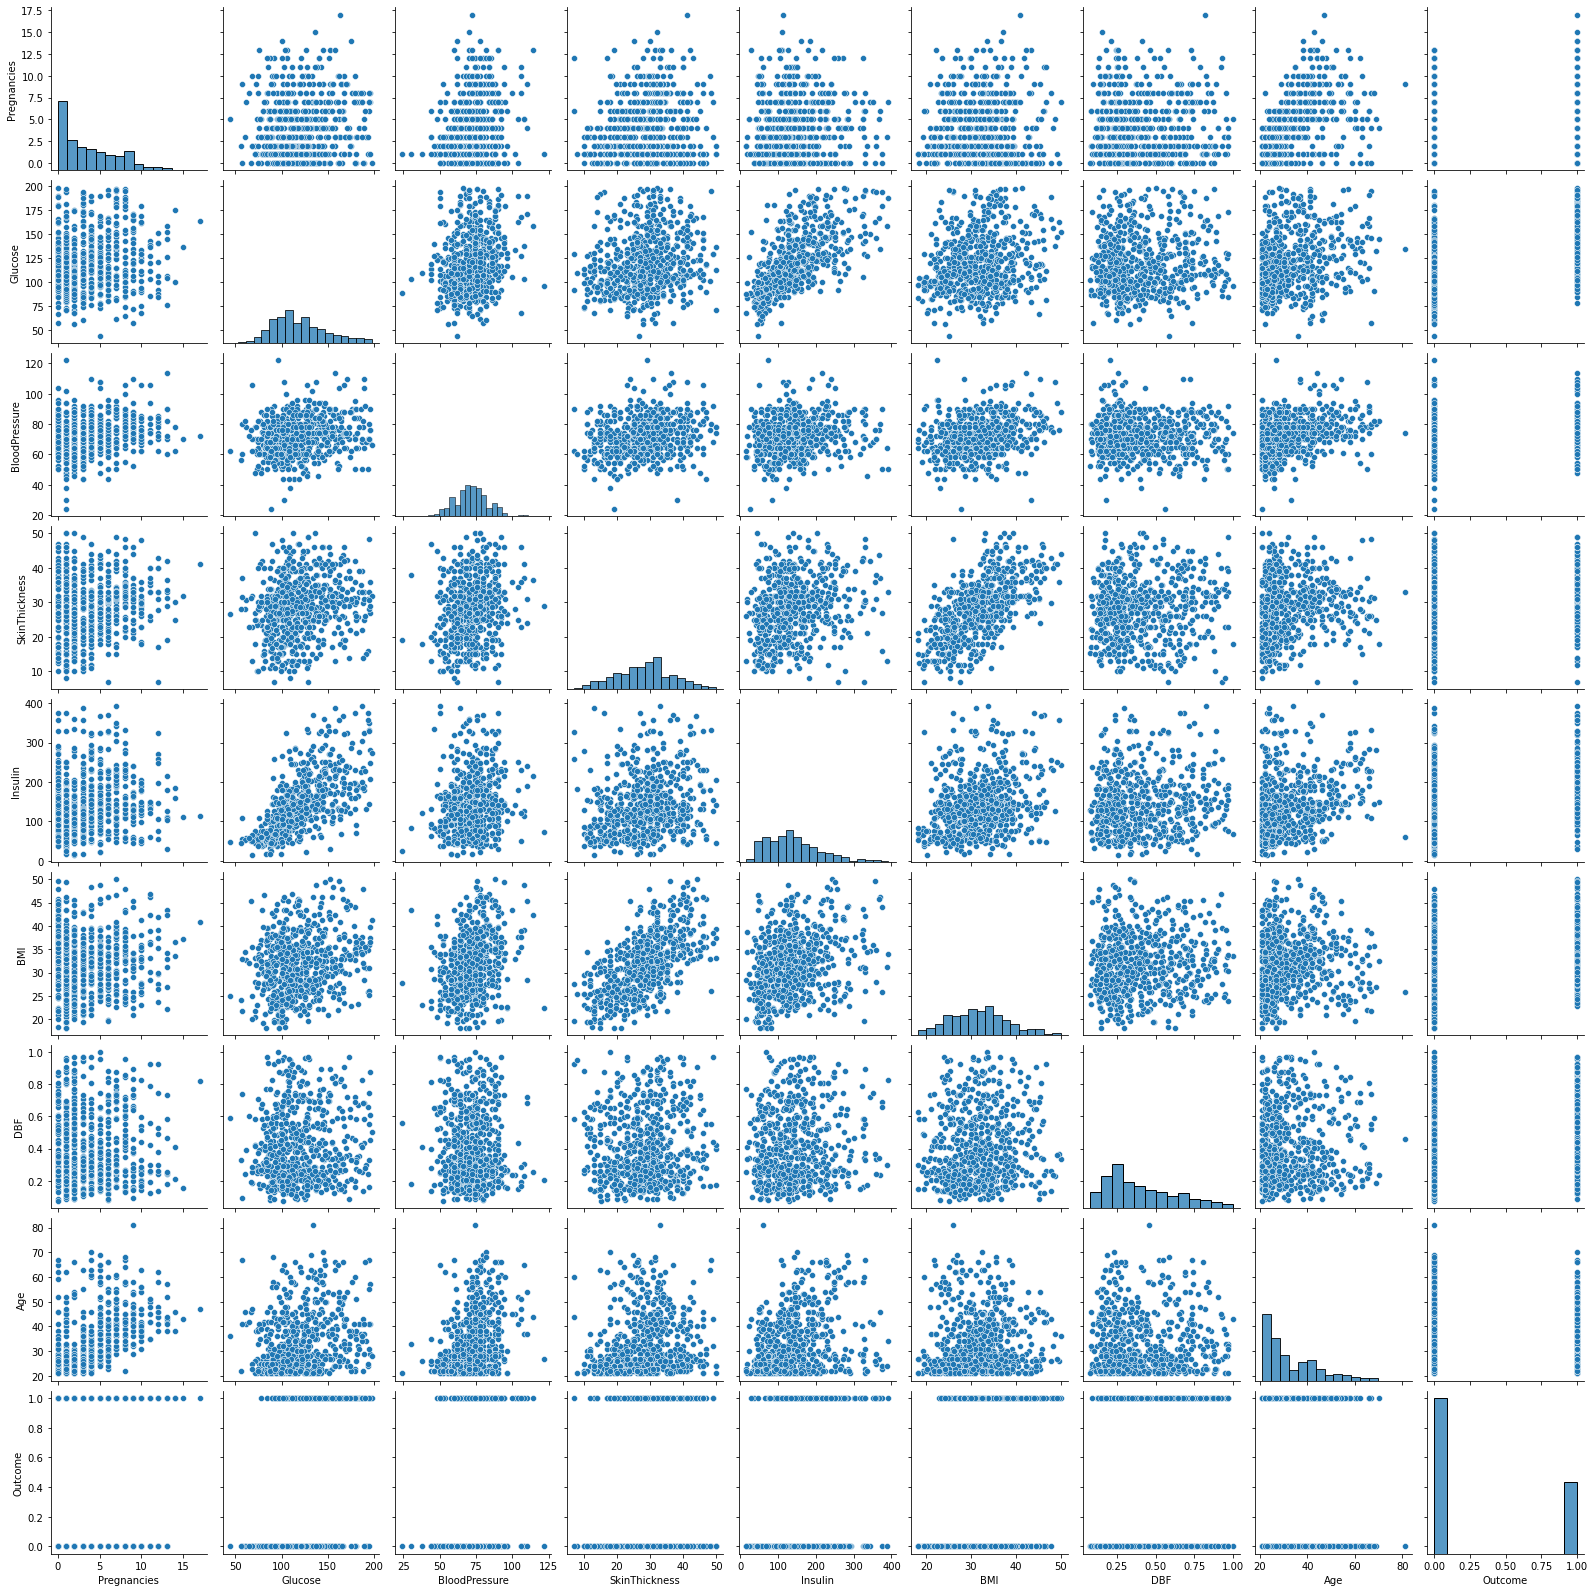

In [ ]:
#Relevant Feature
seaborn.pairplot(df2)
plt.show()

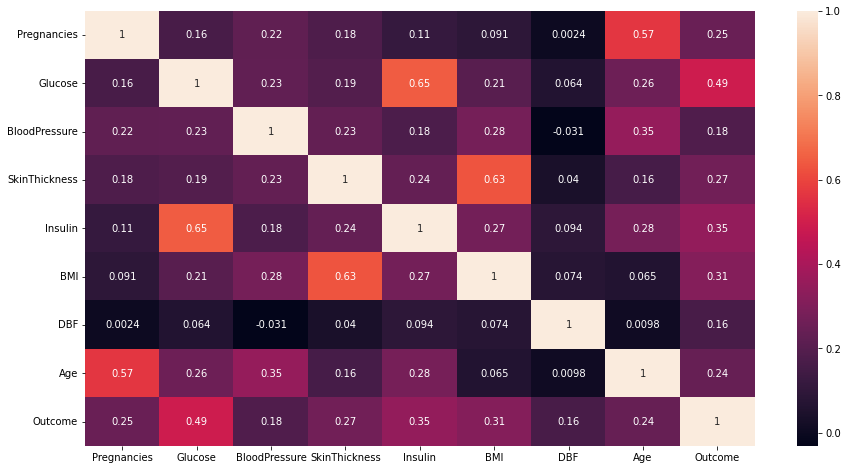

In [ ]:
#Correlation
fig = plt.figure(figsize=(15, 8))
corrMatrix = df2.corr()
sn.heatmap(corrMatrix, annot=True)

plt.show()

In [ ]:
#Descrption of the Dataset after Preprocessing
#X.describe()

In [ ]:
X = df2[[ 'Glucose', 'Pregnancies', 'Age','Insulin', 'BMI','SkinThickness']]
y = df2['Outcome']

In [ ]:
X

,Glucose,Pregnancies,Age,Insulin,BMI,SkinThickness
0,148.0,6.0,50.0,169.0,33.6,35.0
1,85.0,1.0,31.0,58.6,26.6,29.0
2,183.0,8.0,32.0,164.6,23.3,25.8
3,89.0,1.0,21.0,94.0,28.1,23.0
5,116.0,5.0,30.0,102.8,25.6,20.6
...,...,...,...,...,...,...
718,101.0,10.0,63.0,180.0,32.9,48.0
719,122.0,2.0,27.0,165.0,36.8,27.0
720,121.0,5.0,30.0,112.0,26.2,23.0
721,126.0,1.0,47.0,134.2,30.1,35.2


In [ ]:
X.head()

,Glucose,Pregnancies,Age,Insulin,BMI,SkinThickness
0,148.0,6.0,50.0,169.0,33.6,35.0
1,85.0,1.0,31.0,58.6,26.6,29.0
2,183.0,8.0,32.0,164.6,23.3,25.8
3,89.0,1.0,21.0,94.0,28.1,23.0
5,116.0,5.0,30.0,102.8,25.6,20.6


In [ ]:
#Descrption of the Dataset after Preprocessing
X.describe()

,Glucose,Pregnancies,Age,Insulin,BMI,SkinThickness
count,644.00000,644.000000,644.000000,644.000000,644.000000,644.000000
mean,119.76087,3.900621,33.133540,141.493478,31.876708,28.339441
std,29.55121,3.331279,11.749228,73.210924,6.345578,8.612862
min,44.00000,0.000000,21.000000,15.000000,18.200000,7.000000
25%,99.00000,1.000000,24.000000,87.450000,27.300000,22.700000
50%,114.00000,3.000000,29.000000,130.000000,32.000000,29.000000
75%,138.00000,6.000000,40.250000,181.850000,35.800000,33.450000
max,198.00000,17.000000,81.000000,392.000000,50.000000,50.000000


In [ ]:
#Scaling the data on unbalanced Dataset
X = df2[[ 'Glucose', 'Pregnancies', 'Age','Insulin', 'BMI','BloodPressure','SkinThickness']]
y = df2['Outcome']

In [ ]:
Scaler=StandardScaler()
Scaler.fit(X)

StandardScaler()

In [ ]:
X= Scaler.transform(X)
X

array([[ 0.95634261,  0.63069197,  1.4366536 , ...,  0.27178476,
        -0.00408736,  0.77392811],
       [-1.17720695, -0.87139985, -0.18173099, ..., -0.83220308,
        -0.4976355 ,  0.0767541 ],
       [ 2.14164792,  1.23152869, -0.09655286, ..., -1.35265449,
        -0.66215155, -0.29507205],
       ...,
       [ 0.04196423,  0.3302736 , -0.26690913, ..., -0.8952881 ,
        -0.00408736, -0.62041992],
       [ 0.21129356, -0.87139985,  1.18111919, ..., -0.28020916,
        -0.99118365,  0.79716725],
       [-0.90628002, -0.87139985, -0.86315608, ..., -0.23289539,
        -0.1686034 ,  0.30914544]])

In [ ]:
#X.head()

In [ ]:
#Balancing the dataset with the undersampling technique
# class count
class_count_0, class_count_1 = df2['Outcome'].value_counts()
# Separate class
class_0 = df2[df2['Outcome'] == 0]
class_1 = df2[df2['Outcome'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (441, 9)
class 1: (203, 9)


total class of 1 and0: 0.0    203
1.0    203
Name: Outcome, dtype: int64


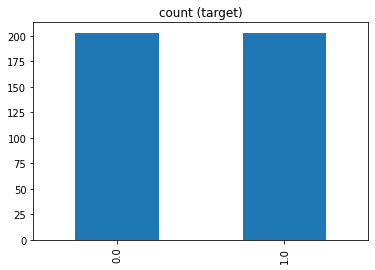

In [ ]:
class_0_under = class_0.sample(class_count_1)
test_under = pd.concat([class_0_under, class_1], axis=0)
print("total class of 1 and0:",test_under['Outcome'].value_counts())# plot the count after under-sampeling
test_under['Outcome'].value_counts().plot(kind='bar', title='count (target)')

In [ ]:
#Undersampling on scaled data
X_under = test_under[[ 'Glucose', 'Pregnancies', 'Age','Insulin', 'BMI','BloodPressure','SkinThickness']]
y_under = test_under['Outcome']

In [ ]:
Scaler=StandardScaler()
Scaler.fit(X_under)

StandardScaler()

In [ ]:
X_under= Scaler.transform(X_under)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size = 0.2,random_state=0)

In [ ]:
#Models on balanced Dataset with scaled data

In [ ]:
#LogistiC regression on balanced Dataset with scaled data
logreg12 = LogisticRegression()
# fit the model with data
logreg12.fit(X_train,y_train)
#
y_pred12=logreg12.predict(X_test)

Text(33.0, 0.5, 'Predicted label')

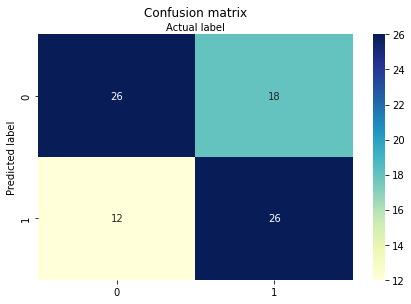

In [ ]:
cm12 = metrics.confusion_matrix(y_test, y_pred12)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm12), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred12))
print("Precision:",metrics.precision_score(y_test, y_pred12))
print("Recall:",metrics.recall_score(y_test, y_pred12))

Accuracy: 0.6341463414634146
Precision: 0.5909090909090909
Recall: 0.6842105263157895


In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred12)

0.6375598086124401

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred12)

0.6341463414634148

In [ ]:
#SVM , on balanced Dataset with scaled data
SVM13 = SVC(random_state=0, kernel='rbf')
SVM13.fit(X_train, y_train)
y_pred13=SVM13.predict(X_test)

Text(33.0, 0.5, 'Predicted label')

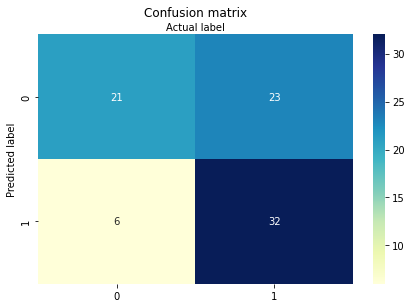

In [ ]:
cm13 = metrics.confusion_matrix(y_test, y_pred13)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm13), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred13))
print("Precision:",metrics.precision_score(y_test, y_pred13))
print("Recall:",metrics.recall_score(y_test, y_pred13))

Accuracy: 0.6463414634146342
Precision: 0.5818181818181818
Recall: 0.8421052631578947


In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred13)

0.659688995215311

In [ ]:

from sklearn.metrics import f1_score
f1_score(y_test,y_pred13)


0.6881720430107526

In [ ]:
#Decision tree on balanced Dataset with scaled data
DTree14 = DecisionTreeClassifier(random_state=0)
DTree14.fit(X_train, y_train)
y_pred14 = DTree14.predict(X_test)

Text(33.0, 0.5, 'Predicted label')

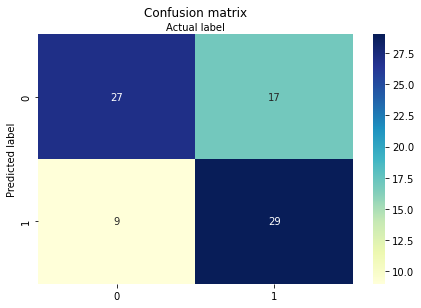

In [ ]:
cm14 = metrics.confusion_matrix(y_test, y_pred14)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm14), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred14))
print("Precision:",metrics.precision_score(y_test, y_pred14))
print("Recall:",metrics.recall_score(y_test, y_pred14))

Accuracy: 0.6829268292682927
Precision: 0.6304347826086957
Recall: 0.7631578947368421


In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred14)

0.6883971291866028

In [ ]:

from sklearn.metrics import f1_score
f1_score(y_test,y_pred14)

0.6904761904761905

In [ ]:
#Random Forest on balanced Dataset with scaled data
#Create a Gaussian Classifier
RForest15=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
RForest15.fit(X_train,y_train)
y_pred15=RForest15.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

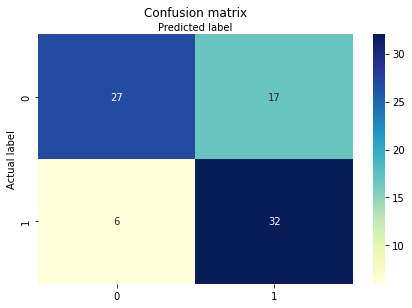

In [ ]:
CM15 = metrics.confusion_matrix(y_test, y_pred15)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(CM15), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred15))
print("Precision:",metrics.precision_score(y_test, y_pred15))
print("Recall:",metrics.recall_score(y_test, y_pred15))

Accuracy: 0.7195121951219512
Precision: 0.6530612244897959
Recall: 0.8421052631578947


In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred15)

0.7278708133971291

In [ ]:

from sklearn.metrics import f1_score
f1_score(y_test,y_pred15)

0.735632183908046

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

In [ ]:
#conda update jupyter

In [ ]:
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
X_train = pd.DataFrame(X_train_res)
y_train = pd.DataFrame(y_train_res)

In [ ]:
frames = (X_train,y_train)
dataset = pd.concat(frames)
dataset.head()

,0,1,2,3,4,5,6,Outcome
0,-0.703085,-0.270563,-0.266909,-1.059319,-1.983505,0.653977,-2.014768,NaN
1,-0.703085,-0.871400,-1.033512,-1.688129,1.060348,-0.004087,0.192950,NaN
2,1.836855,-0.570981,-0.777978,-0.293811,1.990852,1.312041,1.006319,NaN
3,-0.093499,-0.570981,-1.033512,-0.963630,-1.053001,1.476557,-1.085203,NaN
4,-0.161231,-0.871400,-0.096553,-0.621886,0.429497,-0.168603,0.192950,NaN


In [ ]:
dataset.Outcome.value_counts()

0.0    357
1.0    357
Name: Outcome, dtype: int64

In [ ]:
LABELS = ["Normal", "Diabetic"]

Text(0, 0.5, 'Number of Occurances')

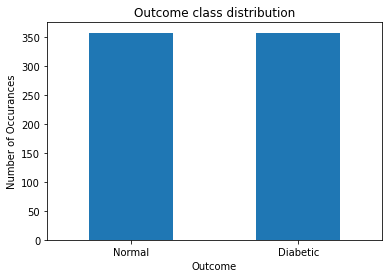

In [ ]:
count_classes = pd.value_counts(dataset['Outcome'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Outcome class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Outcome")
plt.ylabel("Number of Occurances")

In [ ]:
# logreg12 = LogisticRegression()
# # fit the model with data
# logreg12.fit(X_train,y_train)
# #
# y_pred12=logreg12.predict(X_test)



# #Logistic Regression
# logreg12 = LogisticRegression()
# # fit the model with data
# logreg12.fit(X_train,np.ravel(y_train,order='C'))


# # y_pred12=logreg12.predict(X_test)
# # # y_pred12=ravel().y_pred12

logreg12 = LogisticRegression()
# fit the model with data
logreg12.fit(X_train,y_train.values.ravel())
#
y_pred12=logreg12.predict(X_test)
#len(y_pred12.shape)


Text(33.0, 0.5, 'Predicted label')

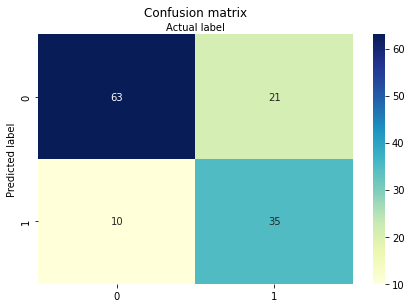

In [ ]:
cm12 = metrics.confusion_matrix(y_test, y_pred12)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm12), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred12))
print("Precision:",metrics.precision_score(y_test, y_pred12))
print("Recall:",metrics.recall_score(y_test, y_pred12))

Accuracy: 0.7596899224806202
Precision: 0.625
Recall: 0.7777777777777778


In [ ]:
from sklearn.metrics import roc_auc_score
# roc_auc_score(y_test, y_pred12[:,1])
roc_auc_score(y_test, y_pred12)


0.7638888888888888

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred12)

0.6930693069306931

In [ ]:
#SVM
SVM13 = SVC(random_state=0, kernel='rbf')
SVM13.fit(X_train, y_train)
y_pred13=SVM13.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(33.0, 0.5, 'Predicted label')

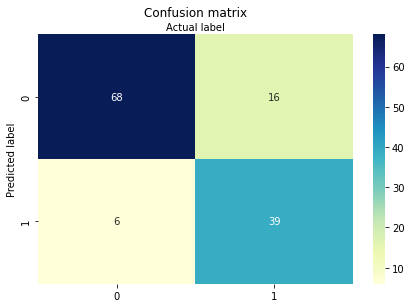

In [ ]:
cm13 = metrics.confusion_matrix(y_test, y_pred13)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm13), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred13))
print("Precision:",metrics.precision_score(y_test, y_pred13))
print("Recall:",metrics.recall_score(y_test, y_pred13))

Accuracy: 0.8294573643410853
Precision: 0.7090909090909091
Recall: 0.8666666666666667


In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred13)


0.8380952380952381

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred13)

0.7800000000000001

In [ ]:
#Decision Tree
DTree14 = DecisionTreeClassifier(random_state=0)
DTree14.fit(X_train, y_train)
y_pred14 = DTree14.predict(X_test)

Text(33.0, 0.5, 'Predicted label')

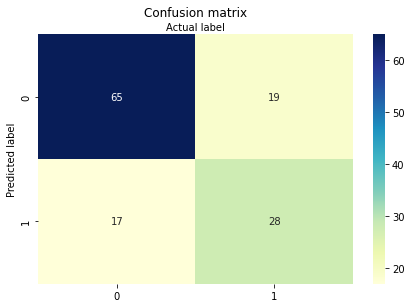

In [ ]:
cm14 = metrics.confusion_matrix(y_test, y_pred14)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm14), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred14))
print("Precision:",metrics.precision_score(y_test, y_pred14))
print("Recall:",metrics.recall_score(y_test, y_pred14))

Accuracy: 0.7209302325581395
Precision: 0.5957446808510638
Recall: 0.6222222222222222


In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred14)

0.6980158730158731

In [ ]:

from sklearn.metrics import f1_score
f1_score(y_test,y_pred14)


0.608695652173913

In [ ]:
#Random Forest
#Create a Gaussian Classifier
RForest15=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
RForest15.fit(X_train,y_train)
y_pred15=RForest15.predict(X_test)

<ipython-input-510-28da02d4b597>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RForest15.fit(X_train,y_train)


Text(0.5, 257.44, 'Predicted label')

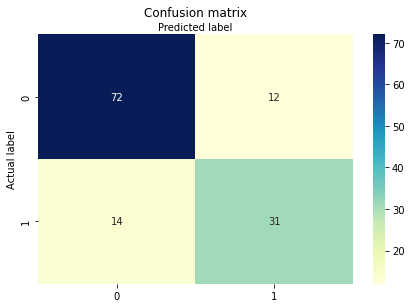

In [ ]:
CM15 = metrics.confusion_matrix(y_test, y_pred15)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(CM15), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred15))
print("Precision:",metrics.precision_score(y_test, y_pred15))
print("Recall:",metrics.recall_score(y_test, y_pred15))

Accuracy: 0.7984496124031008
Precision: 0.7209302325581395
Recall: 0.6888888888888889


In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred15)

0.7730158730158732

In [ ]:

from sklearn.metrics import f1_score
f1_score(y_test,y_pred15)


0.7045454545454545

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)


In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample=RandomOverSampler(sampling_strategy="minority")
x_randomover,y_randomover = oversample.fit_resample(X_train,y_train)
y_randomover.value_counts()


0.0    357
1.0    357
Name: Outcome, dtype: int64

In [ ]:
logreg12 = LogisticRegression()

In [ ]:
# fit the model with data
logreg12.fit(x_randomover,y_randomover.ravel())

LogisticRegression()

In [ ]:
y_pred12=logreg12.predict(X_test)

Text(33.0, 0.5, 'Predicted label')

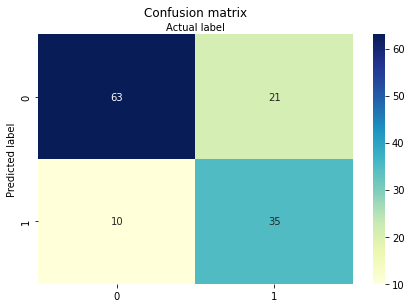

In [ ]:
cm12 = metrics.confusion_matrix(y_test, y_pred12)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm12), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred12))
print("Precision:",metrics.precision_score(y_test, y_pred12))
print("Recall:",metrics.recall_score(y_test, y_pred12))

Accuracy: 0.7596899224806202
Precision: 0.625
Recall: 0.7777777777777778


In [ ]:
from sklearn.metrics import roc_auc_score
# roc_auc_score(y_test, y_pred12[:,1])
roc_auc_score(y_test, y_pred12)

0.7638888888888888

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred12)

0.6930693069306931

In [ ]:
#SVM
SVM13 = SVC(random_state=0, kernel='rbf')
SVM13.fit(x_randomover, y_randomover)
y_pred13=SVM13.predict(X_test)

Text(33.0, 0.5, 'Predicted label')

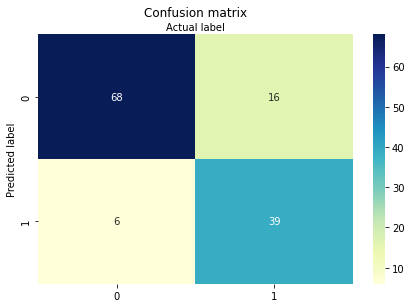

In [ ]:
cm13 = metrics.confusion_matrix(y_test, y_pred13)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm13), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [ ]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred13))
print("Precision:",metrics.precision_score(y_test, y_pred13))
print("Recall:",metrics.recall_score(y_test, y_pred13))

Accuracy: 0.8294573643410853
Precision: 0.7090909090909091
Recall: 0.8666666666666667


In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred13)

0.8380952380952381

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred13)

0.7800000000000001

In [ ]:
#Decision Tree
DTree14 = DecisionTreeClassifier(random_state=0)
DTree14.fit(x_randomover, y_randomover)
y_pred14 = DTree14.predict(X_test)

Text(33.0, 0.5, 'Predicted label')

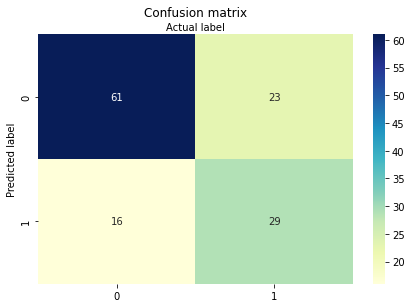

In [ ]:
cm14 = metrics.confusion_matrix(y_test, y_pred14)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm14), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred14))
print("Precision:",metrics.precision_score(y_test, y_pred14))
print("Recall:",metrics.recall_score(y_test, y_pred14))

Accuracy: 0.6976744186046512
Precision: 0.5576923076923077
Recall: 0.6444444444444445


In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred14)

0.6853174603174602

In [ ]:

from sklearn.metrics import f1_score
f1_score(y_test,y_pred14)

0.5979381443298969

In [ ]:
#Random Forest
#Create a Gaussian Classifier
RForest15=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
RForest15.fit(x_randomover,y_randomover)
y_pred15=RForest15.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

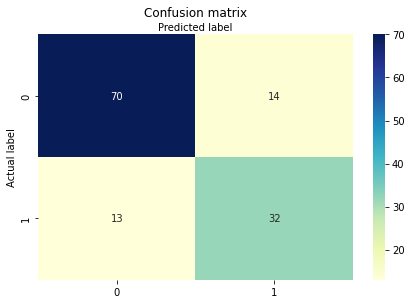

In [ ]:
CM15 = metrics.confusion_matrix(y_test, y_pred15)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(CM15), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred15))
print("Precision:",metrics.precision_score(y_test, y_pred15))
print("Recall:",metrics.recall_score(y_test, y_pred15))

Accuracy: 0.7906976744186046
Precision: 0.6956521739130435
Recall: 0.7111111111111111


In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred15)

0.7722222222222223

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred15)

0.7032967032967032

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

In [ ]:
pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
oversample = BorderlineSMOTE()
x_border,y_border = oversample.fit_resample(X_train,y_train)
y_border.value_counts()

0.0    357
1.0    357
Name: Outcome, dtype: int64

In [ ]:
logreg12 = LogisticRegression()
# fit the model with data
logreg12.fit(x_border,y_border.ravel())

LogisticRegression()

In [ ]:
y_pred12=logreg12.predict(X_test)

Text(33.0, 0.5, 'Predicted label')

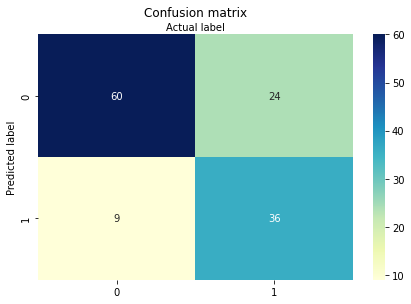

In [ ]:
cm12 = metrics.confusion_matrix(y_test, y_pred12)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm12), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred12))
print("Precision:",metrics.precision_score(y_test, y_pred12))
print("Recall:",metrics.recall_score(y_test, y_pred12))

Accuracy: 0.7441860465116279
Precision: 0.6
Recall: 0.8


In [ ]:
from sklearn.metrics import roc_auc_score
# roc_auc_score(y_test, y_pred12[:,1])
roc_auc_score(y_test, y_pred12)

0.7571428571428572

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred12)

0.6857142857142857

In [ ]:
#SVM
SVM13 = SVC(random_state=0, kernel='rbf')
SVM13.fit(x_border,y_border.ravel())
y_pred13=SVM13.predict(X_test)

Text(33.0, 0.5, 'Predicted label')

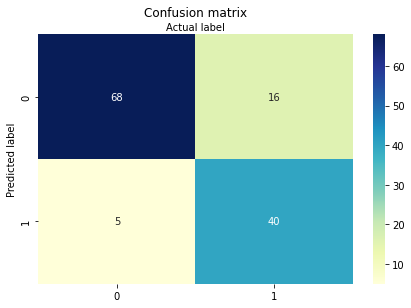

In [ ]:
cm13 = metrics.confusion_matrix(y_test, y_pred13)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm13), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred13))
print("Precision:",metrics.precision_score(y_test, y_pred13))
print("Recall:",metrics.recall_score(y_test, y_pred13))



Accuracy: 0.8372093023255814
Precision: 0.7142857142857143
Recall: 0.8888888888888888


In [ ]:
roc_auc_score(y_test, y_pred13)

0.8492063492063492

In [ ]:
f1_score(y_test,y_pred13)


0.792079207920792

In [ ]:
#Decision Tree
DTree14 = DecisionTreeClassifier(random_state=0)
DTree14.fit(x_border,y_border.ravel())
y_pred14 = DTree14.predict(X_test)

Text(33.0, 0.5, 'Predicted label')

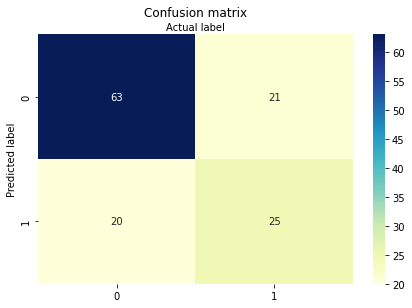

In [ ]:
cm14 = metrics.confusion_matrix(y_test, y_pred14)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm14), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred14))
print("Precision:",metrics.precision_score(y_test, y_pred14))
print("Recall:",metrics.recall_score(y_test, y_pred14))

Accuracy: 0.6821705426356589
Precision: 0.5434782608695652
Recall: 0.5555555555555556


In [ ]:
roc_auc_score(y_test, y_pred14)

0.6527777777777778

In [ ]:
f1_score(y_test,y_pred14)

0.5494505494505495

In [ ]:
#Random Forest
#Create a Gaussian Classifier
RForest15=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
RForest15.fit(x_border,y_border.ravel())
y_pred15=RForest15.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

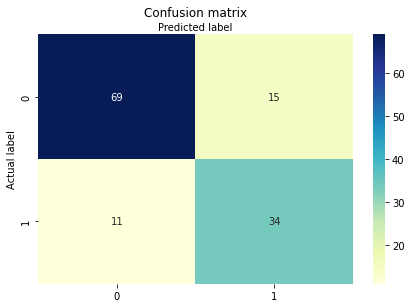

In [ ]:
CM15 = metrics.confusion_matrix(y_test, y_pred15)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(CM15), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred15))
print("Precision:",metrics.precision_score(y_test, y_pred15))
print("Recall:",metrics.recall_score(y_test, y_pred15))


Accuracy: 0.7984496124031008
Precision: 0.6938775510204082
Recall: 0.7555555555555555


In [ ]:
roc_auc_score(y_test, y_pred15)

0.7884920634920635

In [ ]:
f1_score(y_test,y_pred15)

0.723404255319149

In [ ]:
from imblearn.over_sampling import ADASYN
oversample = ADASYN()
x_ada,y_ada = oversample.fit_resample(X_train,y_train)
y_ada.value_counts()

1.0    394
0.0    357
Name: Outcome, dtype: int64

In [ ]:
logreg12 = LogisticRegression()
# fit the model with data
logreg12.fit(x_ada,y_ada)
y_pred12=logreg12.predict(X_test)

Text(33.0, 0.5, 'Predicted label')

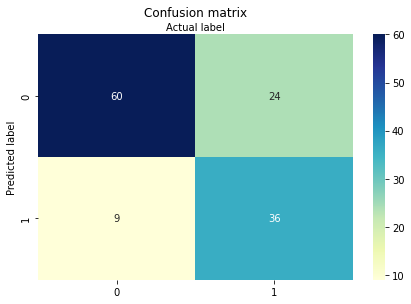

In [ ]:
cm12 = metrics.confusion_matrix(y_test, y_pred12)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm12), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred12))
print("Precision:",metrics.precision_score(y_test, y_pred12))
print("Recall:",metrics.recall_score(y_test, y_pred12))

Accuracy: 0.7441860465116279
Precision: 0.6
Recall: 0.8


In [ ]:
roc_auc_score(y_test, y_pred12)

0.7571428571428572

In [ ]:
f1_score(y_test,y_pred12)

0.6857142857142857

In [ ]:
#SVM
SVM13 = SVC(random_state=0, kernel='rbf')
SVM13.fit(x_ada,y_ada)
y_pred13=SVM13.predict(X_test)


Text(33.0, 0.5, 'Predicted label')

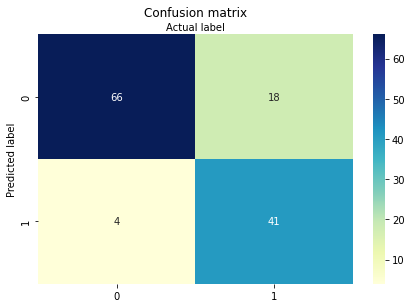

In [ ]:
cm13 = metrics.confusion_matrix(y_test, y_pred13)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm13), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred13))
print("Precision:",metrics.precision_score(y_test, y_pred13))
print("Recall:",metrics.recall_score(y_test, y_pred13))

Accuracy: 0.8294573643410853
Precision: 0.6949152542372882
Recall: 0.9111111111111111


In [ ]:
roc_auc_score(y_test, y_pred13)

0.8484126984126983

In [ ]:
f1_score(y_test,y_pred13)

0.7884615384615385

In [ ]:
#Decision Tree
DTree14 = DecisionTreeClassifier(random_state=0)
DTree14.fit(x_ada,y_ada)
y_pred14 = DTree14.predict(X_test)

Text(33.0, 0.5, 'Predicted label')

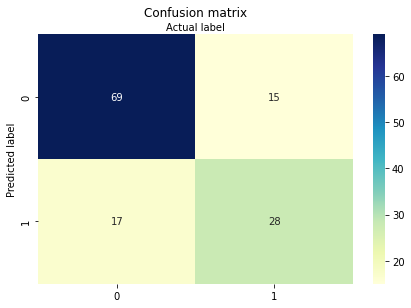

In [ ]:
cm14 = metrics.confusion_matrix(y_test, y_pred14)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm14), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred14))
print("Precision:",metrics.precision_score(y_test, y_pred14))
print("Recall:",metrics.recall_score(y_test, y_pred14))

Accuracy: 0.751937984496124
Precision: 0.6511627906976745
Recall: 0.6222222222222222


In [ ]:
roc_auc_score(y_test, y_pred14)

0.7218253968253968

In [ ]:
f1_score(y_test,y_pred14)

0.6363636363636364

In [ ]:
#Random Forest
#Create a Gaussian Classifier
RForest15=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
RForest15.fit(x_ada,y_ada)
y_pred15=RForest15.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

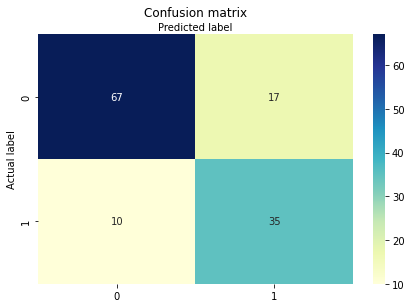

In [ ]:
CM15 = metrics.confusion_matrix(y_test, y_pred15)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(CM15), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred15))
print("Precision:",metrics.precision_score(y_test, y_pred15))
print("Recall:",metrics.recall_score(y_test, y_pred15))

Accuracy: 0.7906976744186046
Precision: 0.6730769230769231
Recall: 0.7777777777777778


In [ ]:
roc_auc_score(y_test, y_pred15)

0.7876984126984127

In [ ]:
f1_score(y_test,y_pred15)

0.7216494845360825

In [ ]:
from imblearn.combine import SMOTEENN
sme= SMOTEENN()
x_sme,y_sme = sme.fit_resample(X_train,y_train)
y_sme.value_counts()


1.0    242
0.0    182
Name: Outcome, dtype: int64

In [ ]:
logreg12 = LogisticRegression()
# fit the model with data
logreg12.fit(x_sme,y_sme)
y_pred12=logreg12.predict(X_test)

Text(33.0, 0.5, 'Predicted label')

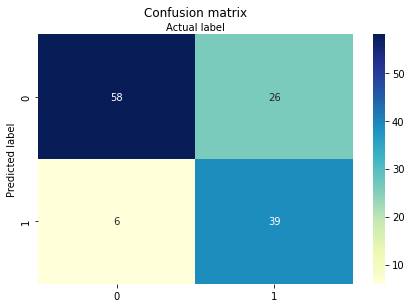

In [ ]:
cm12 = metrics.confusion_matrix(y_test, y_pred12)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm12), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred12))
print("Precision:",metrics.precision_score(y_test, y_pred12))
print("Recall:",metrics.recall_score(y_test, y_pred12))

Accuracy: 0.751937984496124
Precision: 0.6
Recall: 0.8666666666666667


In [ ]:
from sklearn.metrics import roc_auc_score
# roc_auc_score(y_test, y_pred12[:,1])
roc_auc_score(y_test, y_pred12)

0.7785714285714286

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred12)

0.7090909090909091

In [ ]:
#SVM
SVM13 = SVC(random_state=0, kernel='rbf')
SVM13.fit(x_sme,y_sme.ravel())
y_pred13=SVM13.predict(X_test)


Text(33.0, 0.5, 'Predicted label')

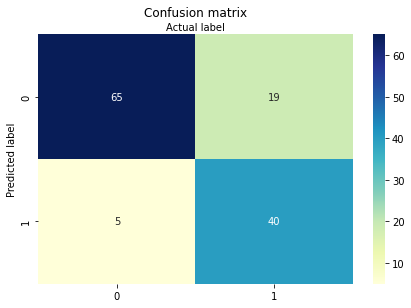

In [ ]:
cm13 = metrics.confusion_matrix(y_test, y_pred13)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm13), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred13))
print("Precision:",metrics.precision_score(y_test, y_pred13))
print("Recall:",metrics.recall_score(y_test, y_pred13))


Accuracy: 0.813953488372093
Precision: 0.6779661016949152
Recall: 0.8888888888888888


In [ ]:
roc_auc_score(y_test, y_pred13)


0.8313492063492063

In [ ]:
f1_score(y_test,y_pred13)


0.7692307692307693

In [ ]:
#Decision Tree
DTree14 = DecisionTreeClassifier(random_state=0)
DTree14.fit(x_sme,y_sme.ravel())
y_pred14 = DTree14.predict(X_test)


Text(33.0, 0.5, 'Predicted label')

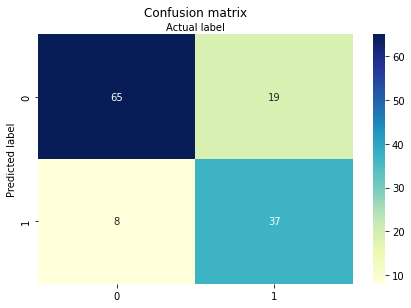

In [ ]:
cm14 = metrics.confusion_matrix(y_test, y_pred14)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm14), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred14))
print("Precision:",metrics.precision_score(y_test, y_pred14))
print("Recall:",metrics.recall_score(y_test, y_pred14))



Accuracy: 0.7906976744186046
Precision: 0.6607142857142857
Recall: 0.8222222222222222


In [ ]:
roc_auc_score(y_test, y_pred14)


0.798015873015873

In [ ]:
f1_score(y_test,y_pred14)



0.7326732673267325

In [ ]:
#Random Forest
#Create a Gaussian Classifier
RForest15=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
RForest15.fit(x_sme,y_sme)
y_pred15=RForest15.predict(X_test)


Text(0.5, 257.44, 'Predicted label')

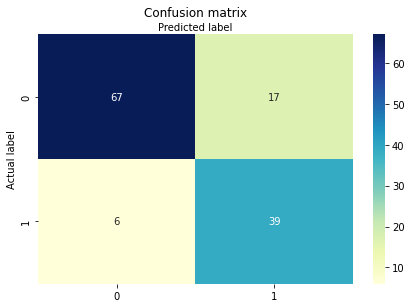

In [ ]:
CM15 = metrics.confusion_matrix(y_test, y_pred15)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(CM15), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred15))
print("Precision:",metrics.precision_score(y_test, y_pred15))
print("Recall:",metrics.recall_score(y_test, y_pred15))


Accuracy: 0.8217054263565892
Precision: 0.6964285714285714
Recall: 0.8666666666666667


In [ ]:
roc_auc_score(y_test, y_pred15)

0.8321428571428572

In [ ]:
f1_score(y_test,y_pred15)


0.7722772277227722

In [ ]:

from imblearn.combine import SMOTETomek
smt= SMOTETomek()
x_smt,y_smt = smt.fit_resample(X_train,y_train)
y_smt.value_counts()


0.0    348
1.0    348
Name: Outcome, dtype: int64

In [ ]:
logreg12 = LogisticRegression()
# fit the model with data
logreg12.fit(x_smt,y_smt)
y_pred12=logreg12.predict(X_test)

Text(33.0, 0.5, 'Predicted label')

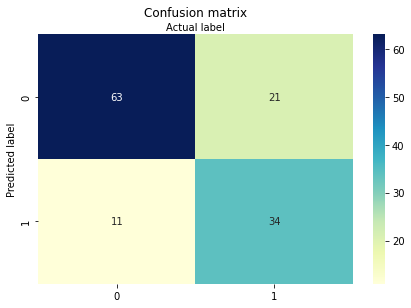

In [ ]:
cm12 = metrics.confusion_matrix(y_test, y_pred12)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm12), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred12))
print("Precision:",metrics.precision_score(y_test, y_pred12))
print("Recall:",metrics.recall_score(y_test, y_pred12))

Accuracy: 0.751937984496124
Precision: 0.6181818181818182
Recall: 0.7555555555555555


In [ ]:
from sklearn.metrics import roc_auc_score
# roc_auc_score(y_test, y_pred12[:,1])
roc_auc_score(y_test, y_pred12)

0.7527777777777778

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred12)

0.6799999999999999

In [ ]:
#SVM
SVM13 = SVC(random_state=0, kernel='rbf')
SVM13.fit(x_smt,y_smt.ravel())
y_pred13=SVM13.predict(X_test)


Text(33.0, 0.5, 'Predicted label')

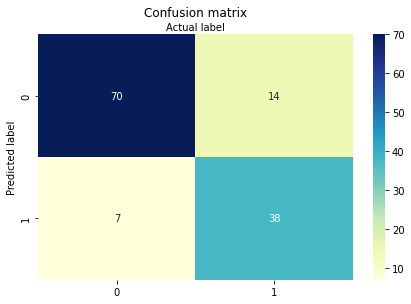

In [ ]:
cm13 = metrics.confusion_matrix(y_test, y_pred13)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm13), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred13))
print("Precision:",metrics.precision_score(y_test, y_pred13))
print("Recall:",metrics.recall_score(y_test, y_pred13))


Accuracy: 0.8372093023255814
Precision: 0.7307692307692307
Recall: 0.8444444444444444


In [ ]:
roc_auc_score(y_test, y_pred13)


0.838888888888889

In [ ]:
f1_score(y_test,y_pred13)


0.7835051546391751

In [ ]:
#Decision Tree
DTree14 = DecisionTreeClassifier(random_state=0)
DTree14.fit(x_smt,y_smt.ravel())
y_pred14 = DTree14.predict(X_test)


Text(33.0, 0.5, 'Predicted label')

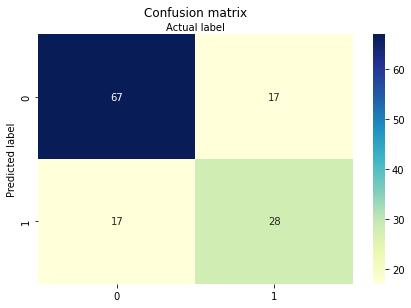

In [ ]:
cm14 = metrics.confusion_matrix(y_test, y_pred14)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm14), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred14))
print("Precision:",metrics.precision_score(y_test, y_pred14))
print("Recall:",metrics.recall_score(y_test, y_pred14))


Accuracy: 0.7364341085271318
Precision: 0.6222222222222222
Recall: 0.6222222222222222


In [ ]:
roc_auc_score(y_test, y_pred14)


0.709920634920635

In [ ]:
f1_score(y_test,y_pred14)


0.6222222222222222

In [ ]:
#Random Forest
#Create a Gaussian Classifier
RForest15=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
RForest15.fit(x_smt,y_smt)
y_pred15=RForest15.predict(X_test)


Text(0.5, 257.44, 'Predicted label')

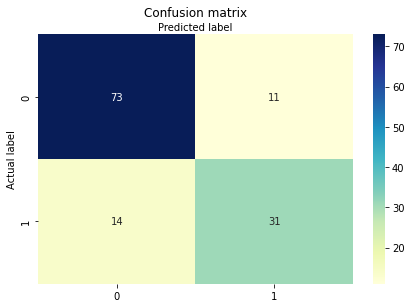

In [ ]:
CM15 = metrics.confusion_matrix(y_test, y_pred15)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(CM15), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred15))
print("Precision:",metrics.precision_score(y_test, y_pred15))
print("Recall:",metrics.recall_score(y_test, y_pred15))



Accuracy: 0.8062015503875969
Precision: 0.7380952380952381
Recall: 0.6888888888888889


In [ ]:
roc_auc_score(y_test, y_pred15)


0.778968253968254

In [ ]:
f1_score(y_test,y_pred15)


0.7126436781609196

In [ ]:
# #Define SMOTE-ENN
# from imblearn.over_sampling import SMOTEENN
# resample=SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

In [ ]:
# pip install imblearn.over

In [ ]:
# # from sklearn.linear_model import AdaBoostClassifier
# ##Using SMOTE-ENN to balance the data
# #Define model
# model=LogisticRegression()
# #Define SMOTE-ENN
# pi
# import imblearn.over
# from imblearn.over_sampling import SMOTEENN
# resample=SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))
# #Define pipeline
# pipeline=Pipeline(steps=[('r', resample), ('m', model)])
# #Define evaluation procedure (here we use Repeated Stratified K-Fold CV)
# cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# #Evaluate model
# scoring=['accuracy','precision_macro','recall_macro']
# scores = cross_validate(pipeline, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1)

# # summarize performance
# print('Mean Accuracy: %.4f' % np.mean(scores['test_accuracy']))
# print('Mean Precision: %.4f' % np.mean(scores['test_precision_macro']))
# print('Mean Recall: %.4f' % np.mean(scores['test_recall_macro']))